# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

For this analysis, we will explore a dataset from kaggle. The dataset contains information on 426K cars. Our goal is to understand what factors make a car more or less expensive. As a result of our analysis, we provide clear recommendations to the client -- a used car dealership -- as to what consumers value in a used car. We use CRISP-DM model for this analysis, and we will employ feature selection and regression techniques to analyze the dataset, identifying the most significant features (key drivers) that influence the price. The goal is to develop a robust predictive model that can accurately estimate used car prices based on these key features.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.



1-	Load the Data: Load the dataset into a DataFrame to facilitate exploration. 
2-	Understand the Data Structure(i.e. head() and info()) 
3-	Summary Statistics (i.e. describe()) 
4-	Identify Data Quality Issues:
   - Identify columns with high cardinality or many unique values.
   - Look for inconsistencies in categorical variables (e.g., different spellings of the same category).
   - Check for unrealistic values in numerical columns (e.g., negative values for mileage). 

About Dataset
The vehicles dataset contains total 18 features/variables including target variable named price. Here's brief about each feature:
  • id: Unique identifier of each sample
  • region: Region where vehicle belongs to
  • price: Price of a Vehicle
  • year: Year of a vehicle
  • manufacturer: Manufactures of a vehicle i.e. Ford, Toyota etc.
  • model: Model of the vehicle i.e. Elantra, Camry etc.
  • condition : Condition of a Vehicle
  • cylinders : No. of Cylinders in a vehicle
  • fuel : Fuel type of a vehicle i.e. Gas, Electric etc.
  • odometer : No. of Kms/Miles vehicle has driven
  • title_status : Title of a vehicle
  • transmission : Transmission type of a vehicle i.e. manual/auto etc.
  • VIN : Unique Identifier of a vehicle
  • drive : Drive type of a vehicle i.e front wheel drive etc.
  • size : Size of a car i.e. full-size, compact etc.
  • type : Vehicle type
  • paint_color : Color of a Vehicle i.e. white/black etc.
  • state : State of a vehicle


In [1]:
# libraries #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OrdinalEncoder


from warnings import filterwarnings
filterwarnings('ignore')


In [20]:
# Load the dataset
file_path = './data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
vehicles_df.head(), vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

We do the following steps for Data Preparation:
 
 - Break down the data to cat_col(categorical columns) and num_col (numerical columns)
 - Handle Missing Values  and Feature Encoding: 
     - encode the categorical values(ignoring null values)
     - imputing the missing values of the numerical columns with a BayesianRidge estimator
     - Removing the records which doesnt have the VIN
     - imputing the missing values of the categorical columns with a BayesianRidge estimator
     
 - Handle Outliers, correct data types 
 - Handling inconsistent data (example: price shouldn't be less than 1) 
 - Visualize cleaned Data
 - Drop unnecessary features that don't have impact on the price (i.e. 'VIN', 'paint_color','state','id') & duplicates 

     

In [22]:
#define numeric variable and categorical variable to work separatly on them
num_col=['year','odometer']

# Define categorical columns
cat_col = [col for col in vehicles_df.columns if col not in num_col]

# Print the results
print("Numerical Columns:", num_col)
print("Categorical Columns:", cat_col)

Numerical Columns: ['year', 'odometer']
Categorical Columns: ['id', 'region', 'price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [24]:
data=vehicles_df.copy()

#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_col))):
    encode(data[cat_col[i]])

100%|██████████| 16/16 [00:00<00:00, 18.20it/s]


In [26]:
data.isnull().sum()[num_col]

year        1205
odometer    4400
dtype: int64

In [28]:
data_num=data[num_col]
imputer_num=IterativeImputer(BayesianRidge()) 
impute_data=imputer_num.fit_transform(data_num)
data[num_col]=impute_data

#Missing values after filling
data.isnull().sum()[num_col]

year        0
odometer    0
dtype: int64

In [30]:
#Missing values for categorical columns
data.isnull().sum()[cat_col] 

id                   0
region               0
price                0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [32]:
# Removing the records which doesnt have the VIN
data = data.dropna(axis=0, subset=['VIN'])

#Filling missing categorical columns
data_cat=data[cat_col]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in cat_col:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
data[cat_col]=data_cat  

data.isnull().sum()[cat_col] 

id              0
region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [34]:
# Any  duplicated rows?
data.duplicated('VIN').sum()

147592

In [36]:
data = data.drop_duplicates(subset='VIN', keep='last')
# Any  duplicated rows?
data.duplicated('VIN').sum()


0

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118246 entries, 116 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118246 non-null  int64  
 1   region        118246 non-null  object 
 2   price         118246 non-null  int64  
 3   year          118246 non-null  float64
 4   manufacturer  118246 non-null  object 
 5   model         118246 non-null  object 
 6   condition     118246 non-null  object 
 7   cylinders     118246 non-null  object 
 8   fuel          118246 non-null  object 
 9   odometer      118246 non-null  float64
 10  title_status  118246 non-null  object 
 11  transmission  118246 non-null  object 
 12  VIN           118246 non-null  object 
 13  drive         118246 non-null  object 
 14  size          118246 non-null  object 
 15  type          118246 non-null  object 
 16  paint_color   118246 non-null  object 
 17  state         118246 non-null  object 
dtypes: floa

In [40]:
# Drop the  columns that don't have impact on the price
data.drop(['VIN', 'paint_color','state','id'], axis=1, inplace=True)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models. Here, you should build a number of different regression models with the price as the target. In building your models, you should explore different parameters and be sure to cross-validate your findings.

We have analysed the data against various regression models through different hyperparameters and perform cross validation to determine the best suited model for a vehicle dataset. The models used in current applications are:

- Linear Regression Model with Polynomial Degree
- Linear Regression Model with Feature Selection
- Lasso Regression Model
- Ridge Regression Model

Prior to the model selection we run the Permutation to find the Features importance


In [42]:
#prepare the data for modeling 
# Split the data into features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:

column_names = data.columns[data.columns != 'price']


In [106]:
#Linear regression Model with polynomial degree

# determine best complexity #
model1_train_mses = []
model1_test_mses = []

for i in range(1, 5):
    pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = i, include_bias=False)), ('linreg', LinearRegression())])
    
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    model1_train_mses.append(mean_squared_error(y_train, train_preds))
    model1_test_mses.append(mean_squared_error(y_test, test_preds))

best_model_complexity = model1_test_mses.index(min(model1_test_mses)) + 1
print(f'Linear Regression (Best Polynomial Degree ) : = {best_model_complexity} ')



Linear Regression (Best Polynomial Degree ) : = 2 


In [112]:
lr_poly_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias=False)), ('linreg', LinearRegression())])
lr_poly_pipe.fit(X_train, y_train)
test_preds = lr_poly_pipe.predict(X_test)
lr_poly_pipe_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lr_poly_pipe_r2 = r2_score(y_test, test_preds)
print(f'Linear Regression (Polynomial Degree Complexity 3) : RMSE = {lr_poly_pipe_rmse:.4f}, R2 = {lr_poly_pipe_r2:.4f} ')



Linear Regression (Polynomial Degree Complexity 3) : RMSE = 3428.0065, R2 = 0.3599 


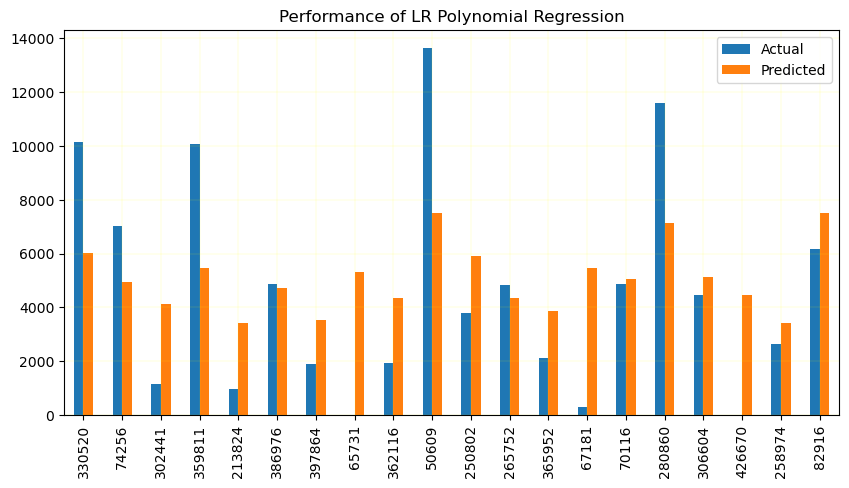

In [90]:


df_check = pd.DataFrame({'Actual': y_test, 'Predicted': test_preds})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of LR Polynomial Regression')
plt.show()

         Feature  Importance
1           year    0.209377
10         drive    0.079368
7       odometer    0.074482
6           fuel    0.065084
5      cylinders    0.046336
9   transmission    0.022395
4      condition    0.018024
11          size    0.010136
3          model    0.008004
12          type    0.007730
2   manufacturer    0.003957
0         region    0.003794
8   title_status    0.001215


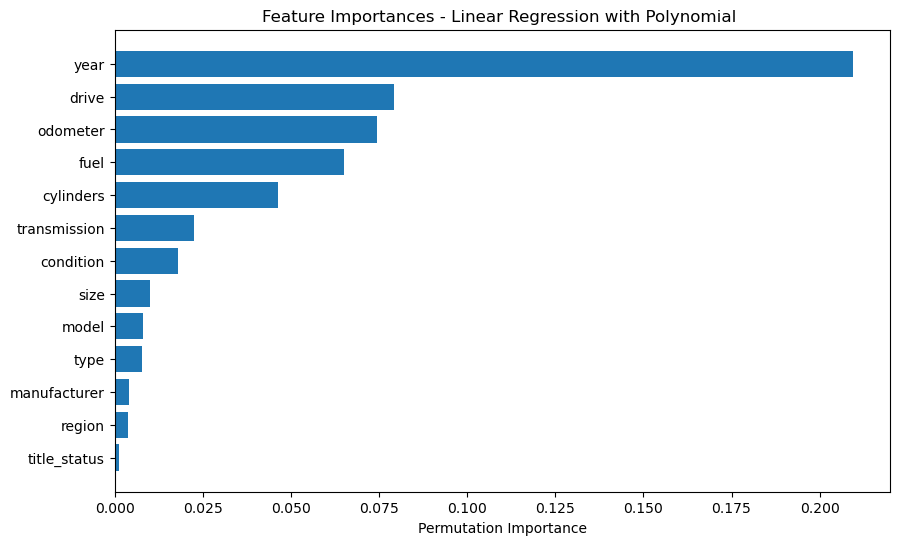

In [88]:
# Calculate permutation importance for LR 
perm_importance = permutation_importance(lr_poly_pipe, X_test, y_test)


# Convert permutation importance results to DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df_sorted = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
#

print(perm_importance_df_sorted)


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df_sorted['Feature'], perm_importance_df_sorted['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importances - Linear Regression with Polynomial ')
plt.gca().invert_yaxis()
plt.show()

In [54]:
# Lasso Regression with Feature Selection =3 
#linear regression model with 3 features #
lasso_pipe = Pipeline([('column_selector',SequentialFeatureSelector(estimator=Lasso(random_state = 42), n_features_to_select=3)),('lasso',Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
lasso_selector1 = lasso_pipe.named_steps['column_selector']

lasso_test_preds = lasso_pipe.predict(X_test)
lasso_pipe_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_preds))
lasso_pipe_r2 = r2_score(y_test, lasso_test_preds)
print("Features:", lasso_selector1.get_feature_names_out())
print(f'Lasso model with SequentialFeatureSelector (3 Features) :  RMSE = {lasso_pipe_rmse:.4f}, R2 = {lasso_pipe_r2:.4f} ')

Features: ['year' 'cylinders' 'transmission']
Lasso model with SequentialFeatureSelector (3 Features) :  RMSE = 3911.6323, R2 = 0.1665 


         Feature  Importance
1           year    0.204649
5      cylinders    0.102580
9   transmission    0.054066
0         region    0.000000
2   manufacturer    0.000000
3          model    0.000000
4      condition    0.000000
6           fuel    0.000000
7       odometer    0.000000
8   title_status    0.000000
10         drive    0.000000
11          size    0.000000
12          type    0.000000


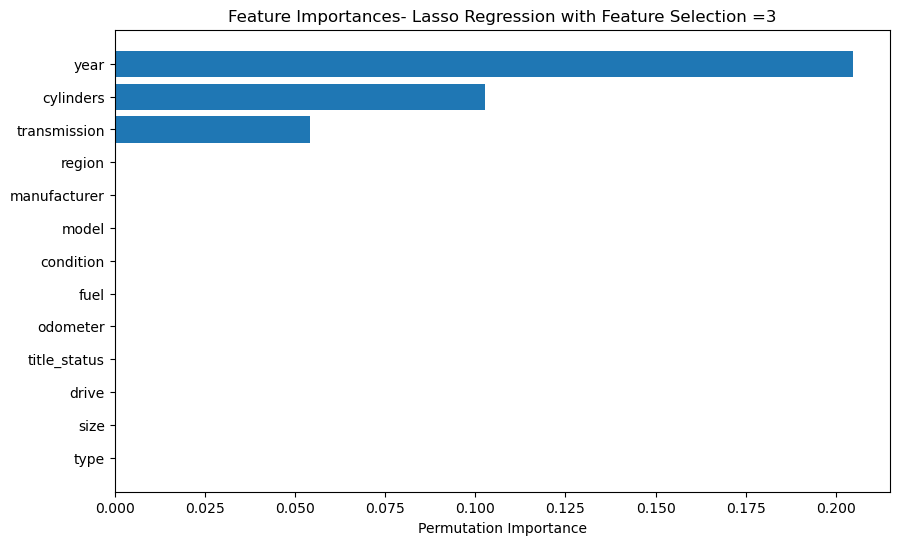

In [56]:
# Calculate permutation importance for lasso 
perm_importance3 = permutation_importance(lasso_pipe, X_test, y_test)

# Extract column names of the DataFrame

# Convert permutation importance results to DataFrame
perm_importance_df3 = pd.DataFrame({
    'Feature': column_names,
    'Importance': perm_importance3.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df3_sorted = perm_importance_df3.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
#

print(perm_importance_df3_sorted)



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df3_sorted['Feature'], perm_importance_df3_sorted['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importances- Lasso Regression with Feature Selection =3')
plt.gca().invert_yaxis()
plt.show()

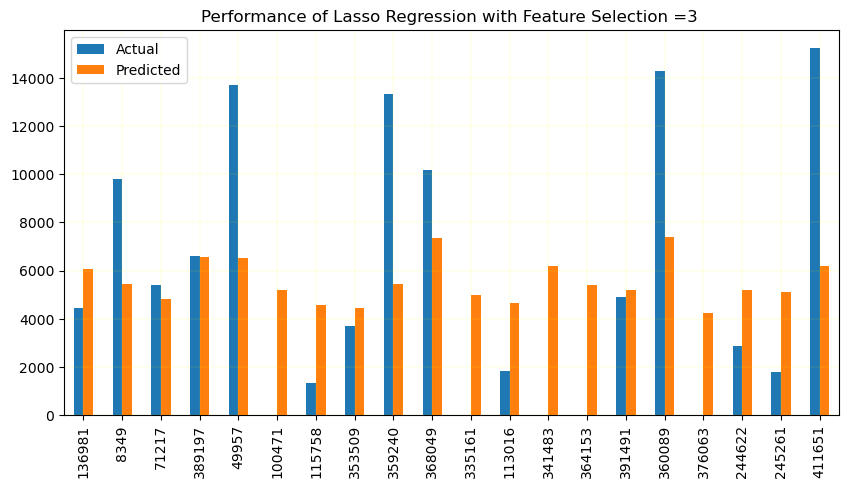

In [94]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_test_preds})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of Lasso Regression with Feature Selection =3 ')
plt.show()

In [58]:
# linear regression model using feature selection using GridSearchCV #
param_dict = {'selector__n_features_to_select':np.linspace(1, 10,10)}
lr_selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),('model', LinearRegression())])
lr_selector_grid = GridSearchCV(estimator=lr_selector_pipe,param_grid=param_dict)
lr_selector_grid.fit(X_train,y_train)
grid_test_preds = lr_selector_grid.predict(X_test)
lr_selector_test_rmse = np.sqrt(mean_squared_error(y_test,grid_test_preds))
lr_selector_pipe_r2 = r2_score(y_test, grid_test_preds)
print(f'Linear Regression with  with SequentialFeatureSelector using GridSearchCV : RMSE = {lr_selector_test_rmse:.4f}, R2 = {lr_selector_pipe_r2:.4f} ')

Linear Regression with  with SequentialFeatureSelector using GridSearchCV : RMSE = 3773.9272, R2 = 0.2242 


         Feature  Importance
1           year    0.144035
5      cylinders    0.089667
9   transmission    0.053770
7       odometer    0.045226
6           fuel    0.037879
10         drive    0.013232
4      condition    0.006642
8   title_status    0.000887
2   manufacturer    0.000765
3          model    0.000225
11          size   -0.000026
12          type   -0.000029
0         region   -0.000059


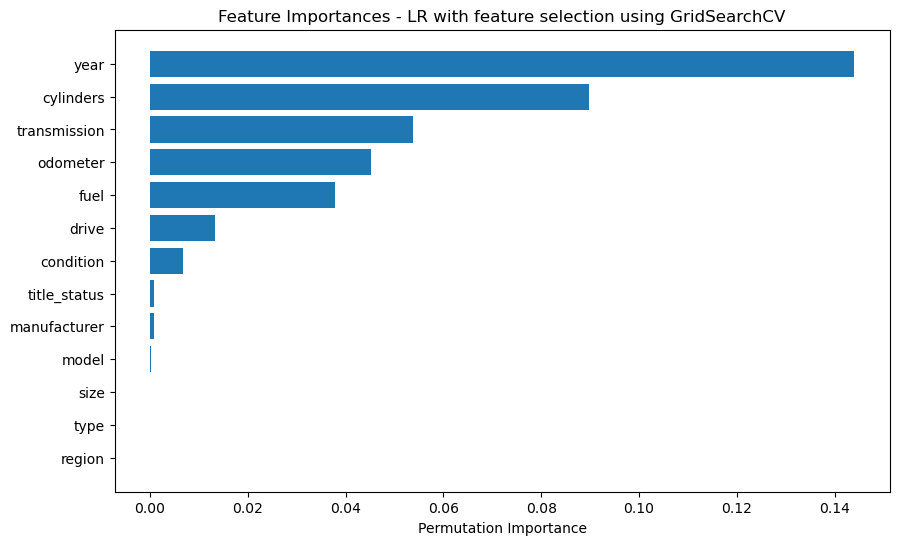

In [62]:
# Calculate permutation importance for LR  with feature selection using GridSearchCV  
perm_importance4 = permutation_importance(lr_selector_grid, X_test, y_test)

# Convert permutation importance results to DataFrame
perm_importance_df4 = pd.DataFrame({
    'Feature': column_names,
    'Importance': perm_importance4.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df4_sorted = perm_importance_df4.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
#

print(perm_importance_df4_sorted)



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df4_sorted['Feature'], perm_importance_df4_sorted['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importances - LR with feature selection using GridSearchCV')
plt.gca().invert_yaxis()
plt.show()

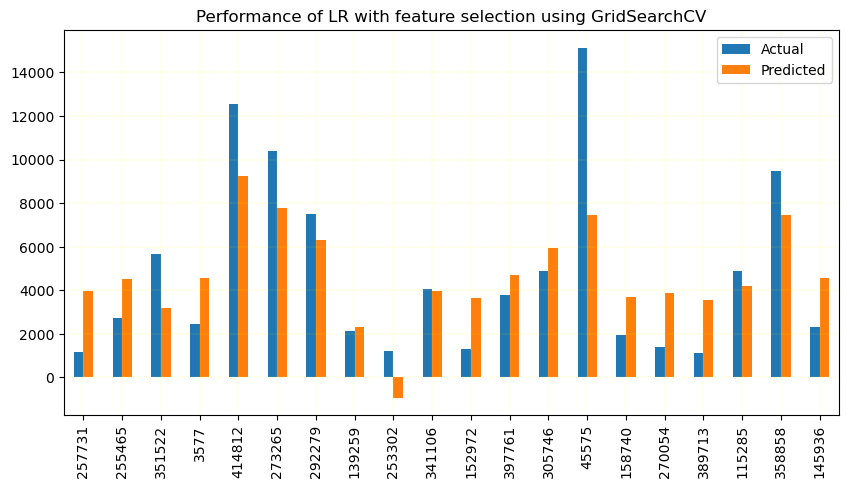

In [96]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': grid_test_preds})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of LR with feature selection using GridSearchCV')
plt.show()

In [100]:
#Ridge Regression Model
# Determine best alpha using GridSearchCV #


ridge_param_dict =  {'alpha': np.logspace(-3, 3, 50)}
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge,param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_grid.best_params_['alpha']
print(f'Best Alpha from GridSearchCV: {best_alpha}')


test_preds = ridge_grid.predict(X_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
ridge_pipe_r2 = r2_score(y_test, test_preds)
best_alpha = ridge_grid.best_params_['alpha']
print(f'Ridge Model (Best Alpha = {best_alpha}) using GridSearchCV : RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_pipe_r2:.4f} ')



Best Alpha from GridSearchCV: 0.001
Ridge Model (Best Alpha = 0.001) using GridSearchCV : RMSE = 3773.9272, R2 = 0.2242 


In [102]:
# Ridge model using best alpha #
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
# Predict on the test set
alpha_test_preds = ridge.predict(X_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,alpha_test_preds))
ridge_pipe_r2 = r2_score(y_test, alpha_test_preds)
print(f'Ridge Model (Best Alpha = {best_alpha}) using GridSearchCV : RMSE = {ridge_test_rmse:.4f}, R2 = {ridge_pipe_r2:.4f} ')

Ridge Model (Best Alpha = 0.001) using GridSearchCV : RMSE = 3773.9272, R2 = 0.2242 


         Feature  Importance
1           year    0.145788
5      cylinders    0.092400
9   transmission    0.051605
7       odometer    0.045395
6           fuel    0.037719
10         drive    0.013375
4      condition    0.006047
2   manufacturer    0.000886
8   title_status    0.000787
3          model    0.000183
12          type    0.000039
11          size    0.000026
0         region   -0.000074


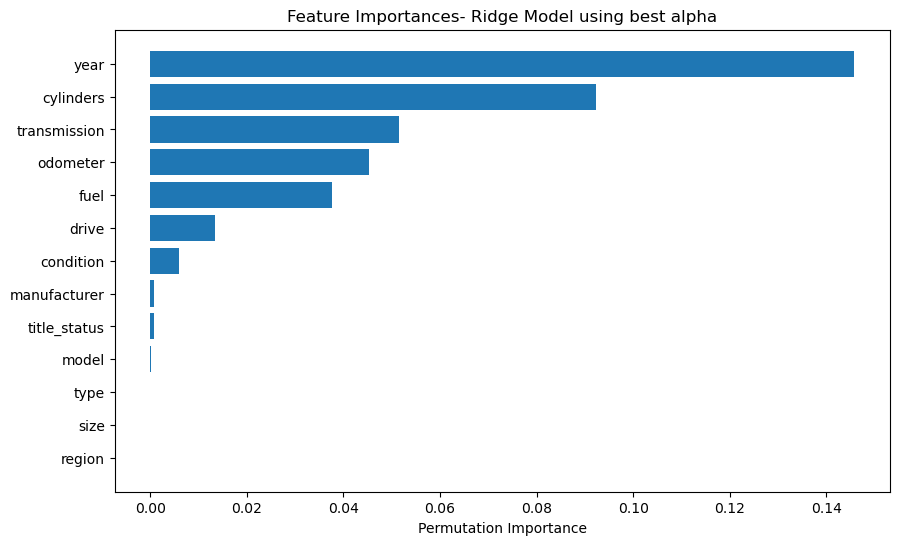

In [70]:
# Calculate permutation importance for LR  with feature selection using GridSearchCV  
perm_importance5 = permutation_importance(ridge, X_test, y_test)

# Extract column names of the DataFrame

# Convert permutation importance results to DataFrame
perm_importance_df5 = pd.DataFrame({
    'Feature': column_names,
    'Importance': perm_importance5.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df5_sorted = perm_importance_df5.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
#

print(perm_importance_df5_sorted)



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df5_sorted['Feature'], perm_importance_df5_sorted['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Feature Importances- Ridge Model using best alpha')
plt.gca().invert_yaxis()
plt.show()

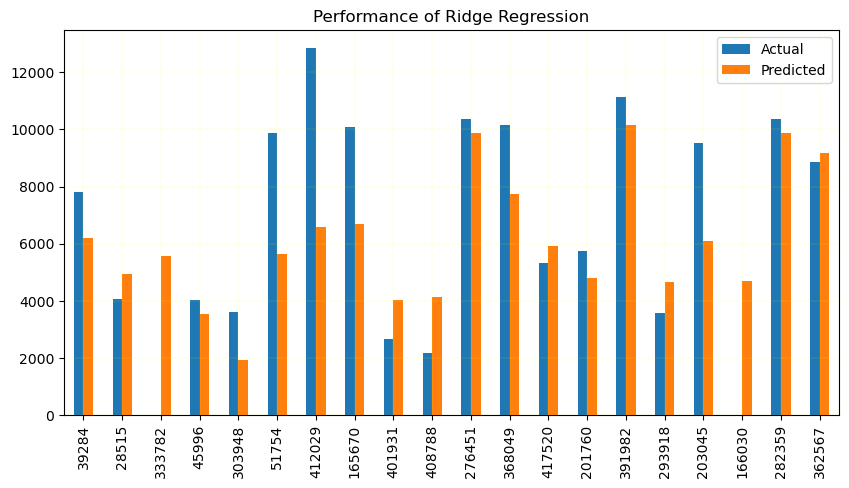

In [72]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': alpha_test_preds})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of Ridge Regression')
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

We determined the best suited model (Ridge Regression Model) and perform following tasks on this model :
 - Predict the Price against Test Dataset (Actual vs Predicted)
 - Model Indicators i.e., MSE, RSME, R2 Score
 - Coefficients and Intercept
 - Visualize Linear Regression on Actual Vs Predicted
 - Visualize Price against each Independent Variables


In [114]:
# get coef and intercept for LR with polynomial (degree=2)
# Access the coefficients and intercept from the linear regression step in the pipeline
coefficients = lr_poly_pipe.named_steps['linreg'].coef_
intercept = lr_poly_pipe.named_steps['linreg'].intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [ 1.66567916e+02 -1.96145542e+04  2.16293311e+03 -3.82171282e+00
 -4.87551262e+04 -1.67054386e+04  3.66772993e+04  2.00596658e-01
  3.05811019e+03  8.12985632e+03  2.11986307e+04  3.15431355e+04
 -7.98459748e+03  9.92538529e-03 -8.52970063e-02 -1.91223616e-02
 -2.69490799e-06  8.30536699e-01 -3.30579079e-01  9.75831916e-01
  1.62969633e-06  2.74532539e-01 -2.12260468e-02 -9.89477677e-02
 -2.02462616e-01 -2.89033056e-02  4.93961513e+00 -1.08420185e+00
  1.82306181e-03  2.42699769e+01  8.28137532e+00 -1.96774510e+01
 -1.00135609e-04 -1.45330525e+00 -4.06628480e+00 -1.20287379e+01
 -1.54674878e+01  4.04554005e+00  3.66692083e-01 -9.09812545e-04
  1.49716563e+00  5.87097990e+00  1.47101686e+00  2.00555187e-05
  1.14364702e+00 -1.02949177e+01  1.27430102e+01 -4.76131290e+00
 -1.00701647e+00  3.06986476e-06 -2.37636114e-03  8.59221182e-03
  1.08771947e-02 -2.41379894e-09 -1.91024115e-03 -3.02892475e-03
 -7.84090498e-04  4.26379818e-03  3.19121334e-03  2.72567504e+01
  3.7341325

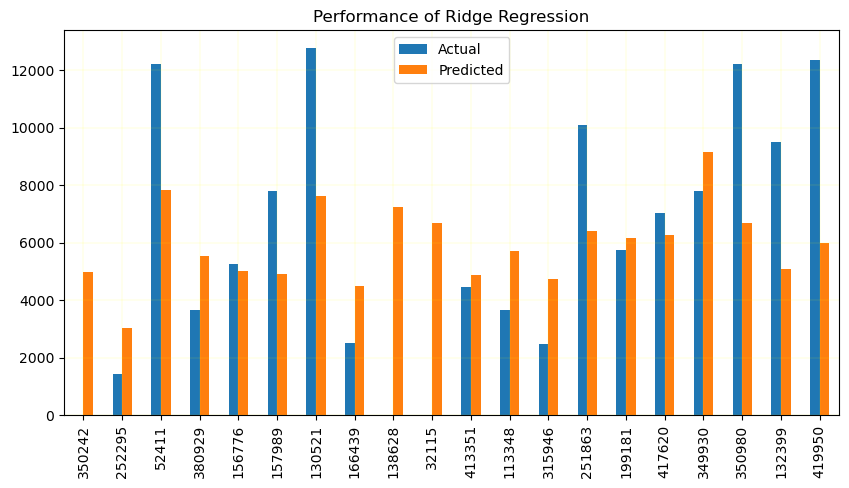

In [76]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': alpha_test_preds})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of Ridge Regression')
plt.show()

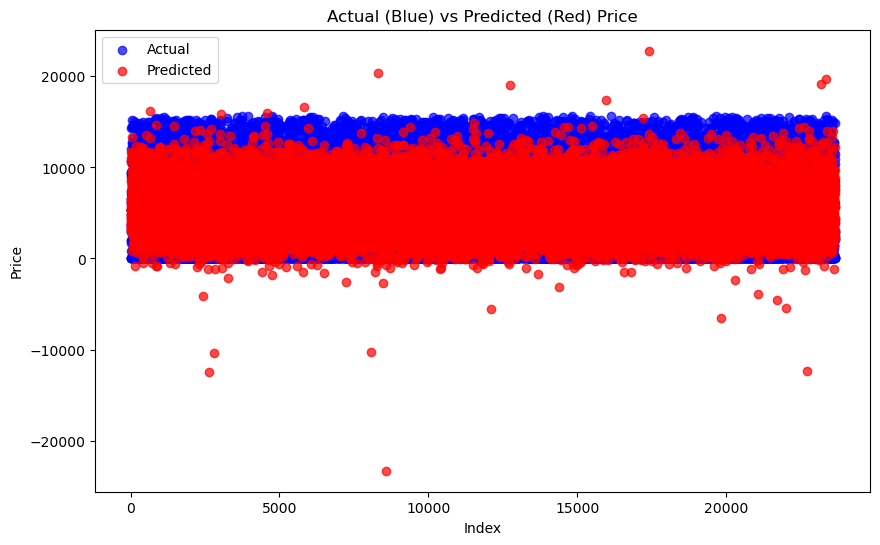

In [116]:


# Visualize Actual vs Predicted Prices with Different Colors
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.7, color='blue', label='Actual')
plt.scatter(range(len(y_test)), test_preds, alpha=0.7, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual (Blue) vs Predicted (Red) Price')
plt.legend()
plt.show()





### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.